<a href="https://colab.research.google.com/github/Lapinyata/DEl1/blob/main/A1_IU22_Khabarov_4_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ДОМАШНЕЕ ЗАДАНИЕ 1. Дескриптивный анализ данных**
Выполнил: Хабаров М.Э. ИУ6-22М (mark.khabarov@yandex.ru)/(@Lapinyata)

---

**<h2>Цель**

---
Приобрести опыт решения практических задач по анализу данных, таких как загрузка, трансформация, вычисление простых статистик и визуализация данных в виде графиков и диаграмм, посредством языка программирования Python.


**<h2>Вариант**

---
Для того, чтобы узнать варианты для выполнения заданий, был использован *код*, полученный от преподавателя и представленный в ячейке ниже.

Этот *код* строит словарь сопоставления букв русского алфавита и чисел из заданного массива. Далее вариант определяется суммой чисел, соответствующих буквам в фамилии студента, от которой берётся остаток от деления на 40 и далее прибавляется единица.

In [1]:
surname = "Хабаров"  # Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 40 + 1

print("Задача № 1, шаг 5 - вариант: ", variant % 5 + 1)
print("Задача № 1, шаг 11 - вариант: ", variant % 2 + 1 )
print("Задача № 2 - вариант: ", variant % 4 + 1)

Задача № 1, шаг 5 - вариант:  4
Задача № 1, шаг 11 - вариант:  1
Задача № 2 - вариант:  3


## **Задание 1.**  Анализ индикаторов качества государственного управления (The Worldwide Government Indicators, WGI)

---

В данном задании работа будет осуществляться с набором данных `wgidataset.xlsx`.

Этот набор данных содержит в себе показатели *WGI (Worldwide Governance Indicators)* — это общемировые показатели управления, основанные на многолетней исследовательской программе Всемирного банка и охватывающие шесть ключевых аспектов управления за период с 1996 года по настоящее время. Они измеряют качество управления в более чем 200 странах на основе почти 40 источников данных, подготовленных более чем 30 организациями по всему миру, и ежегодно обновляются с 2002 года.

**Источник**: Daniel Kaufmann and Aart Kraay (2023). Worldwide Governance Indicators, 2023 Update (www.govindicators.org), Accessed on 10/19/2023.

В данной работе, в соответствии с условием задания, будет использоваться только один из показателей управления — контроль над коррупцией (Control of Corruption). Этот параметр отражает представления о том, в какой степени государственная власть используется для личной выгоды, включая как мелкие, так и крупные формы коррупции, а также "захват" государства элитами и частными интересами.

### 1. Осуществим загрузку набора данных в датафрейм и посмотрим, как выглядят данные, с которыми предстоит работать.

---

In [2]:
# Монтирование гугл диска
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Подключение необходимых для работы библиотек
import pandas as pd               # Библиотека для работы с данными
import numpy as np                # Библиотека для математических вычислений
import matplotlib.pyplot as plt   # Библиотека для построения графиков

In [4]:
# Считываем набор данных из листа о Контроле Коррупции из Excel-файла, указывая строку, в которой содержатся заголовки столбцов
df = pd.read_excel("/content/drive/MyDrive/ML_BMSTU/HomeTask_1/wgidataset.xlsx", sheet_name = "ControlofCorruption", header = [14])
print(f'Размер датафрейма: {df.shape[0]} строк на {df.shape[1]} столбцов') # Получение размеров датафрейма
df.head() # Вывод первых 5 строк датафрейма

Размер датафрейма: 214 строк на 146 столбцов


,Country/Territory,Code,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate.1,StdErr.1,...,NumSrc.22,Rank.22,Lower.22,Upper.22,Estimate.23,StdErr.23,NumSrc.23,Rank.23,Lower.23,Upper.23
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,78.571426,62.857143,89.047623,0.756785,0.317250,2.0,77.830185,60.849056,88.679245
1,Andorra,ADO,1.318143,0.480889,1.0,87.096771,72.043015,96.774193,1.334759,0.453149,...,1.0,88.571426,70.000000,96.666664,1.270204,0.463415,1.0,88.679245,68.396225,97.169815
2,Afghanistan,AFG,-1.291705,0.340507,2.0,4.301075,0.000000,27.419355,-1.176012,0.324013,...,8.0,12.380953,4.761905,20.952381,-1.183776,0.173320,8.0,12.264151,4.716981,20.283018
3,Angola,AGO,-1.167702,0.262077,4.0,9.677420,0.537634,27.419355,-1.180451,0.227055,...,10.0,29.047619,19.523809,40.476189,-0.601941,0.160003,10.0,30.660378,21.226416,43.396225
4,Anguilla,AIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,73.333336,50.952381,89.047623,1.270204,0.463415,1.0,88.679245,68.396225,97.169815


Полученный датафрейм содержит в себе информацию о 214 странах (214 строк) и 146 столбцов:
+ Первые два столбца содержат в себе информацию с названием страны (Country/Territory) и её кодом (Code);
+ Остальные 144 столбца хранят в себе ежегодные срезы показателей контроля коррупции:
    1.   Estimate — Приблизительная оценка эффективности управления (колеблется приблизительно от -2,5 (слабая) до 2,5 (сильная) эффективность управления);
    2.   StdErr	— Стандарная ошибка среднего для Estimate;
    3.   NumSrc	— Количество источников данных, на которых основана оценка;
    4.   Rank	—	Перцентильное ранжирование;
    5.   Lower —	Нижняя граница 90% доверительного интервала для перцентилей;
    6.   Upper —	Верхняя граница 90% доверительного интервала для перцентилей.

### 2. Отсортируем данные по убыванию индекса DataFrame.
---

In [5]:
df.sort_index(ascending=False) # Сортировка датафрейма по индексу в порядке убывания

,Country/Territory,Code,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate.1,StdErr.1,...,NumSrc.22,Rank.22,Lower.22,Upper.22,Estimate.23,StdErr.23,NumSrc.23,Rank.23,Lower.23,Upper.23
213,Zimbabwe,ZWE,-0.278847,0.244907,5.0,47.849461,30.645161,60.752689,-0.504802,0.198134,...,12.0,10.000000,4.285714,17.619047,-1.255139,0.151262,12.0,8.490566,4.245283,17.924528
212,Zambia,ZMB,-0.840641,0.262077,4.0,24.731182,5.913979,41.397850,-0.853156,0.227055,...,12.0,25.714285,17.619047,33.809525,-0.529200,0.152557,12.0,34.433964,23.584906,45.754719
211,"Congo, Dem. Rep.",ZAR,-1.647852,0.315914,3.0,0.000000,0.000000,12.365591,-1.416679,0.310343,...,11.0,4.285714,0.000000,6.666667,-1.544474,0.149016,12.0,3.301887,0.471698,7.075472
210,South Africa,ZAF,0.732927,0.210325,6.0,76.344086,66.129036,81.182793,0.638809,0.188628,...,11.0,53.809525,46.190475,60.000000,-0.319765,0.157883,11.0,44.811321,31.603773,52.358490
209,Serbia,SRB,-1.140072,0.262077,4.0,11.827957,0.537634,29.032259,-1.195605,0.191027,...,9.0,35.714287,26.190475,48.095238,-0.456188,0.158030,9.0,35.377357,24.528301,48.113209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Anguilla,AIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,73.333336,50.952381,89.047623,1.270204,0.463415,1.0,88.679245,68.396225,97.169815
3,Angola,AGO,-1.167702,0.262077,4.0,9.677420,0.537634,27.419355,-1.180451,0.227055,...,10.0,29.047619,19.523809,40.476189,-0.601941,0.160003,10.0,30.660378,21.226416,43.396225
2,Afghanistan,AFG,-1.291705,0.340507,2.0,4.301075,0.000000,27.419355,-1.176012,0.324013,...,8.0,12.380953,4.761905,20.952381,-1.183776,0.173320,8.0,12.264151,4.716981,20.283018
1,Andorra,ADO,1.318143,0.480889,1.0,87.096771,72.043015,96.774193,1.334759,0.453149,...,1.0,88.571426,70.000000,96.666664,1.270204,0.463415,1.0,88.679245,68.396225,97.169815


### 3. Отобразим данные по индексу WGI за 2022 год в виде горизонтального столбчатого графика (столбец *Rank*).
---

Для построения горизонтальной столбчатой диаграммы в библиотеке matplotlib существует специальный метод `barh()`. Испульзуем его для отображения данных по индексу WGI за 2022 год.

Также для удобства работы с графиком (для выбора количества отображемых столбцов) была использована библиотека `ipywidgets`

In [6]:
# Импорт библиотеки для работы с виджетами
import ipywidgets as widgets

In [7]:
# Метод, реализующий построение графика с динамически изменяемым количеством столбцов и направлением
def update(num_of_bars=10, direction=False):
    # Сортировка данных по столбцу Rank за 22й год + удаление стран, по которым нет информации (NaN)
    dfSort = df.sort_values("Rank.23", ascending=direction).dropna(subset=["Rank.23"])
    plt.figure(figsize=(num_of_bars*30/dfSort.shape[0],num_of_bars*50/dfSort.shape[0]))                     # Подгон размера канвы графика
    plt.barh(dfSort["Country/Territory"][0:num_of_bars], dfSort["Rank.23"][0:num_of_bars], color='#f278bf') # Построение графика
    plt.title('Индекс WGI за 2022 год')   # Название графика
    plt.grid(True)                        # Включение сетки
    plt.show()

widgets.interact(update, num_of_bars=(10, df.shape[0], 1), direction=(False,True))  # Объявление виджета для взаимодействия с графиком

interactive(children=(IntSlider(value=10, description='num_of_bars', max=214, min=10), IntSlider(value=0, desc…

<function __main__.update(num_of_bars=10, direction=False)>

### 4. Сформируем DataFrame из исходного набора данных для региона в соответствии с полученным выше вариантом.

  **Вариант №4:** Регион "Middle East and North Africa"

---

В данном задании работа будет осуществляться с набором данных `regions.xlsx`.

In [8]:
# Считываем набор данных из Excel-файла
df_regions = pd.read_excel("/content/drive/MyDrive/ML_BMSTU/HomeTask_1/regions.xlsx")
print(f'Размер датафрейма: {df_regions.shape[0]} строк на {df_regions.shape[1]} столбца') # Получение размеров датафрейма
df_regions.head() # Вывод первых 5 строк датафрейма

Размер датафрейма: 180 строк на 3 столбца


,Country,Code,Region
0,Afghanistan,AFG,AP
1,Albania,ALB,ECA
2,Algeria,DZA,MENA
3,Angola,AGO,SSA
4,Argentina,ARG,AME


Полученный датафрейм содержит в себе информацию о 180 странах (180 строк) и 3 столбца:

1.   Country — Название страны;
2.   Code — Код страны;
2.   Region — Регион страны.

Посмотрим на распределение регионов по количеству стран

<Axes: title={'center': 'Регионы по количеству стран'}, ylabel='Region'>

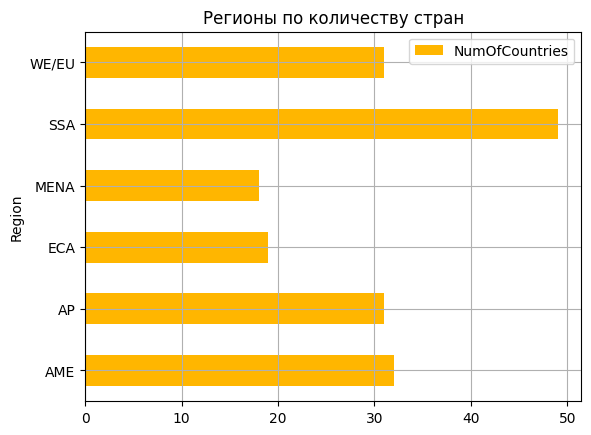

In [9]:
# Группируем данные по регионам и считаем количество стран, называя это значение NumOfCountries
df_regions.groupby('Region').Country.agg(NumOfCountries='count').plot(kind='barh', color='#ffb600', grid=True, title='Регионы по количеству стран')

Так как набор данных по WGI содержит в себе 214 стран (строк), а набор данных по Регионам содержит в себе 180 стран (строк), то необходимо проанализировать несовпадающие между датафреймами значения

In [10]:
# Страны, значения кодов которых есть в таблице Регионов, но нет в таблице WGI
df_regions[ ~ df_regions['Code'].isin(df['Code'])]

,Country,Code,Region
41,Democratic Republic of the Congo,COD,SSA
132,Romania,ROU,WE/EU
161,Timor-Leste,TLS,AP


In [11]:
# Страны, значения кодов которых есть в таблице Регионов, но нет в таблице WGI
df[ ~ df['Code'].isin(df_regions['Code'])][['Country/Territory', 'Code']]

,Country/Territory,Code
0,Aruba,ABW
1,Andorra,ADO
4,Anguilla,AIA
6,Netherlands Antilles (former),ANT
10,American Samoa,ASM
11,Antigua and Barbuda,ATG
25,Belize,BLZ
26,Bermuda,BMU
30,Brunei Darussalam,BRN
42,Cook Islands,COK


В результате изучения наборов данных было обнаружено, что только три страны из набора Регионов не имеют совпадающих кодов с набором WGI:

|Страна|Код|Регион|
|-|-|-|
|Democratic Republic of the Congo|COD|SSA|
|Romania|ROU|WE/EU|
|Timor-Leste|TLS|AP|


В результате ручной проверки оказалось, что такие страны в наборе WGI есть, но имеют отличающиеся значения полей `Code` и `Country`.

Однако по условию **Варианта №4** необходимо работать с регионом *MENA*. Некорректно соединяющиеся страны не относятся к этому региону, поэтому меры по исправлению ошибок соединения можно не применять.


### 5.  Выведите данные DataFrame'a
---

Выполним внутреннее (inner) соединение таблиц Регионов и WGI, удалим дублирующийся столбец 'Country/Territory' и оставим только страны региона "*MENA*":

In [12]:
# Соединение датафреймов по значению столбца Code и удаление столбца
df_merged = pd.merge(df_regions, df, how='inner',on='Code').drop('Country/Territory', axis= 1)
df_merged = df_merged.loc[df_merged['Region'] == 'MENA'] # Фильтрация стран по региону MENA
print(f'Количество стран в регионе "Middle East and North Africa": {df_merged.shape[0]}') # Получение количества стран в регионе
df_merged

Количество стран в регионе "Middle East and North Africa": 18


,Country,Code,Region,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate.1,...,NumSrc.22,Rank.22,Lower.22,Upper.22,Estimate.23,StdErr.23,NumSrc.23,Rank.23,Lower.23,Upper.23
2,Algeria,DZA,MENA,-0.566741,0.262077,4.0,33.333332,16.666666,52.688171,-0.916649,...,7.0,29.523809,19.047619,43.333332,-0.637930,0.176952,7.0,28.301888,19.811321,42.452831
10,Bahrain,BHR,MENA,0.328689,0.312212,3.0,63.978493,50.537636,77.419357,0.250789,...,7.0,58.571430,49.523811,65.714287,0.139386,0.182716,7.0,59.433964,49.528301,66.037735
46,Egypt,EGY,MENA,-0.472254,0.244907,5.0,38.709679,19.892473,53.763439,-0.477870,...,9.0,26.666666,18.095238,36.666668,-0.678810,0.162612,9.0,26.415094,19.811321,38.207546
74,Iran,IRN,MENA,-0.480607,0.262077,4.0,37.634407,18.817204,54.301075,-0.460588,...,7.0,13.809524,5.714286,21.904762,-1.126373,0.178425,6.0,14.150944,6.132075,21.698112
75,Iraq,IRQ,MENA,-1.602183,0.262077,4.0,0.537634,0.000000,9.139785,-1.422613,...,6.0,8.571428,2.380952,19.047619,-1.212934,0.202626,6.0,10.849056,2.830189,20.754717
77,Israel,ISR,MENA,1.354008,0.210325,6.0,88.172043,81.182793,91.397850,1.148573,...,7.0,80.000000,67.142860,83.809525,0.781039,0.196989,7.0,78.773582,66.509438,82.075470
81,Jordan,JOR,MENA,-0.035407,0.244907,5.0,55.376343,39.784946,65.053764,0.112762,...,10.0,55.714287,48.095238,62.857143,0.073047,0.161482,9.0,58.018867,48.113209,63.207546
87,Kuwait,KWT,MENA,0.478682,0.262077,4.0,70.430107,59.139786,80.645164,0.562503,...,6.0,51.904762,40.476189,61.428570,0.127031,0.182716,7.0,58.962265,49.528301,66.037735
91,Lebanon,LBN,MENA,-0.659695,0.262077,4.0,31.182796,13.978495,49.462364,-0.474878,...,9.0,10.476191,4.285714,18.095238,-1.126895,0.176552,7.0,13.679245,6.132075,21.226416
94,Libya,LBY,MENA,-0.871937,0.262077,4.0,20.430107,3.763441,39.247311,-0.907353,...,7.0,3.809524,0.000000,10.000000,-1.525979,0.200476,7.0,3.773585,0.000000,11.320755


В результате был получен набор данных, содержащий в себе 18 стран региона "Middle East and North Africa" и информацию по контролю коррупции в этих странах с 1996 по 2022 годы

### 6. Постройте графики индекса WGI (столбец `Estimate`) за 1996-2022 для стран своего региона.
---

Для начала проверим наличие всех временных точек с 1996 по 2022 в датафрейме WGI

In [13]:
# Чтение строки с годами из Excel, удаление NaN значений, преобразование полученной строки датафрейма в список значений и получение из них только уникальных
distinct_years = set(pd.read_excel("/content/drive/MyDrive/ML_BMSTU/HomeTask_1/wgidataset.xlsx", sheet_name = "ControlofCorruption", header = None, skiprows=13, nrows=1).dropna(axis=1).values[0])
distinct_years

{1996,
 1998,
 2000,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022}

Как мы можем видеть, в датафрейме WGI отсутствуют данные за 1997,1999,2001 года.

В данном случае есть два варианта:


1.   Заполнение отсутствующих данных (предыдущим/следующим значением, средней, медианой и т.д.)
2.   Простое построение графика без заполнения отсутствующих значений. В таком случае при необходимости недостающие значения могут быть найдены с помощью линейной интерполяции и будут находится на прямой, проходящей через две соседние точки

Выберем второй вариант


Выберем из датафрейма столбец *Country* и столбцы *Estimate*...*Estimate.23*.

Установим в качестве индекса столбец *Country*

Далее, с учётом выявленных отсутствующих данных, произведём переименование столбцов *Estimate*...*Estimate.23* в столбцы *1996*, *1998*, *2000*, *2002*...*2022*

In [14]:
# Оставляем только столбцы, содержащие в названии Estimate и Country и устанавливаем Country в качестве индекса
df_MENA_Estimate_WGI = df_merged.filter(regex='Estimate|Country').set_index('Country')
# Переименовываем все столбцы Estimate в года с учётом отсутствия данных
df_MENA_Estimate_WGI.rename(columns = {'Estimate':'1996', 'Estimate.1':'1998', 'Estimate.2':'2000', 'Estimate.3':'2002'}, inplace = True)
new_columns = {f'Estimate.{i+4}': str(2003 + i) for i in range(20)} # Создаем словарь для замены названий столбцов
df_MENA_Estimate_WGI.rename(columns=new_columns, inplace = True)
df_MENA_Estimate_WGI

,1996,1998,2000,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Algeria,-0.566741,-0.916649,-0.987298,-0.928755,-0.715244,-0.699273,-0.466420,-0.564963,-0.592309,-0.633445,...,-0.472623,-0.612656,-0.639073,-0.673417,-0.598509,-0.658660,-0.655895,-0.666460,-0.635658,-0.637930
Bahrain,0.328689,0.250789,0.360481,0.791833,0.374171,0.436752,0.383150,0.188149,0.175550,0.181815,...,0.426163,0.273522,0.107049,-0.047665,-0.171141,-0.176232,-0.038097,-0.093594,0.144544,0.139386
Egypt,-0.472254,-0.477870,-0.492668,-0.440158,-0.530748,-0.583506,-0.539500,-0.737334,-0.737870,-0.765909,...,-0.613802,-0.575115,-0.600651,-0.590742,-0.495696,-0.514393,-0.655166,-0.810555,-0.705532,-0.678810
Iran,-0.480607,-0.460588,-0.401130,-0.218060,-0.311087,-0.359163,-0.477626,-0.484105,-0.556039,-0.755061,...,-0.693659,-0.625268,-0.633904,-0.739657,-0.838276,-0.984159,-1.071326,-1.110737,-1.115693,-1.126373
Iraq,-1.602183,-1.422613,-1.471516,-1.393147,-1.209322,-1.489416,-1.377784,-1.450710,-1.461377,-1.462235,...,-1.315329,-1.363342,-1.432857,-1.461683,-1.431026,-1.458062,-1.389803,-1.334123,-1.268725,-1.212934
Israel,1.354008,1.148573,1.015101,1.196319,1.084417,0.911944,0.823018,1.000245,0.843344,0.884931,...,0.906051,0.860895,0.907212,1.147074,0.790336,0.753772,0.774114,0.536935,0.829617,0.781039
Jordan,-0.035407,0.112762,0.061177,-0.062323,0.333169,0.290118,0.280934,0.279344,0.287264,0.380167,...,0.065909,0.135434,0.244418,0.250655,0.227010,0.123944,0.080425,0.038552,0.026835,0.073047
Kuwait,0.478682,0.562503,0.564559,0.981545,0.765974,0.770029,0.500354,0.426627,0.364862,0.412061,...,-0.195035,-0.246068,-0.254954,-0.297969,-0.359839,-0.316699,-0.159434,-0.091735,-0.056274,0.127031
Lebanon,-0.659695,-0.474878,-0.466838,-0.415403,-0.612620,-0.592864,-0.532332,-0.999498,-0.939466,-0.858251,...,-0.924282,-1.042205,-0.901420,-0.989753,-1.027634,-1.132698,-1.168796,-1.179468,-1.248038,-1.126895


Теперь построим графики индекса WGI для стран своего региона.

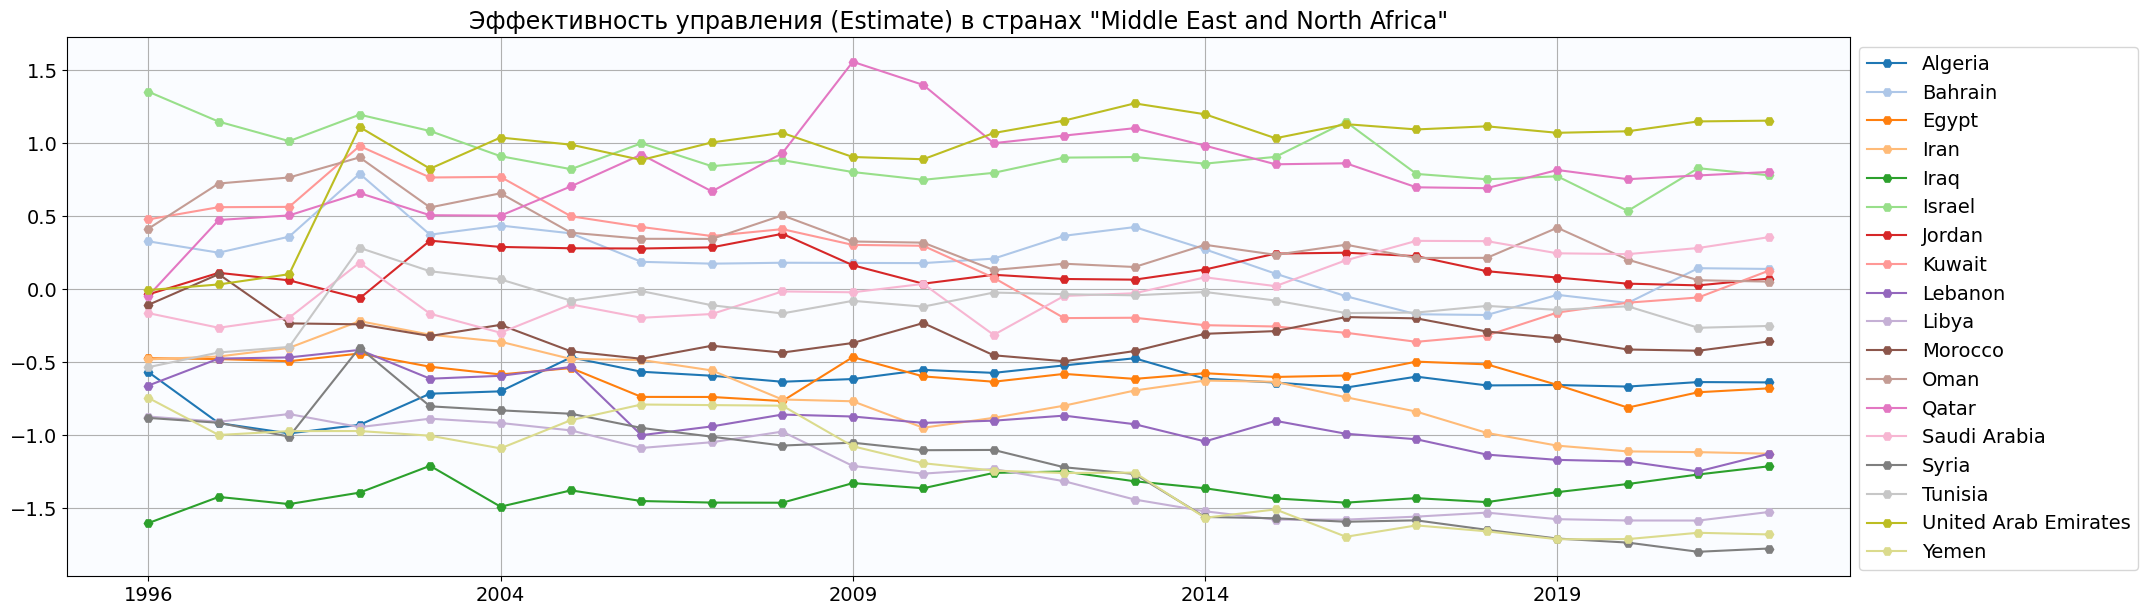

In [15]:
# Построение графика на основе транспонированного датафрейма + установка параметров графика
# Цвета линий графика выбираются из палитры tab_20 из matplotlib последовательно (для каждой из 18ти стран свой цвет)
chart_WGI_all_years=df_MENA_Estimate_WGI.T.plot(grid=True,figsize=(23,7), title='Эффективность управления (Estimate) в странах "Middle East and North Africa"', marker='H', fontsize=14, color=[plt.get_cmap('tab20')(i) for i in range(df_MENA_Estimate_WGI.shape[0])])
chart_WGI_all_years.title.set_size(17)  # Установка размера шрифта заголовка
chart_WGI_all_years.legend(loc='upper left',bbox_to_anchor=(1, 1),fontsize=14)  # Установка параметров Легенд
chart_WGI_all_years.set_facecolor('#fafcff')  # Установка цвета фона

Исходя из полученного графика можно сделать следующие выводы:


*   С 2017 года лидерство по эффективности управления в области контроля над коррупцией удерживает United Arab Emirates, а в тройку лидеров входят также: Qatar и Israel
*   C 2020 года худшие показатели эффективности управления показывает Syria
*   Рекордно высокую эффективность управления показал Qatar в 2009 году
*   Рекордно низкую эффективность управления показала Syria в 2021 году






### 7. Найдите страны с наибольшим и наименьшим значением WGI (Столбец Estimate) в регионе "Middle East and North Africa" за 2022 год
---

В данном случае, так как индексация происходит по странам, то самым оптимальным является использование функций `df_MENA_Estimate_WGI['2022'].idxmax()` и `df_MENA_Estimate_WGI['2022'].idxmin()`, которые возвращают индекс строки с максимальным и минимальным значением соответственно

In [16]:
max_WGI_country=df_MENA_Estimate_WGI['2022'].idxmax()  # Максимальное значение Estimate в 2022
min_WGI_country=df_MENA_Estimate_WGI['2022'].idxmin()  # Минимальное значение Estimate в 2022
print(f'Страна с наибольшим значением Estimate WGI за 2022 год: {max_WGI_country}. Это значение: ')
print(f'Страна с наименьшим значением Estimate WGI за 2022 год: {min_WGI_country}. Это значение: ')

Страна с наибольшим значением Estimate WGI за 2022 год: United Arab Emirates. Это значение: 
Страна с наименьшим значением Estimate WGI за 2022 год: Syria. Это значение: 


Такие же результаты мы получили посредством анализа построенного выше графика

### 8. Определите средние значения  WGI (Столбец Estimate) региона "Middle East and North Africa" за каждый год в период с 1996 по 2022
---

Для получения средних значений по каждому из столбцов датафрейма используется функция `df_MENA_WGI.mean()`

In [17]:
mean_WGI_per_year=df_MENA_Estimate_WGI.mean()
print(f'Средние значения WGI (Столбец Estimate) региона "Middle East and North Africa" по годам в период с 1996 по 2022:\n{mean_WGI_per_year}')

Средние значения WGI (Столбец Estimate) региона "Middle East and North Africa" по годам в период с 1996 по 2022:
1996   -0.255155
1998   -0.214392
2000   -0.227920
2002    0.005365
2003   -0.110138
2004   -0.134619
2005   -0.146972
2006   -0.205434
2007   -0.228394
2008   -0.197921
2009   -0.200338
2010   -0.242790
2011   -0.289805
2012   -0.269579
2013   -0.263348
2014   -0.310855
2015   -0.337412
2016   -0.340242
2017   -0.371198
2018   -0.402726
2019   -0.399918
2020   -0.443916
2021   -0.416095
2022   -0.382464
dtype: float64


### 9. Постройте графики индекса WGI (Столбец Estimate) за 1996-2022 для стран региона "Middle East and North Africa" и выделите страны с наибольшим и наименьшим значением WGI за 2022 год, а также отобразите среднее значение по региону и РФ.
---

Для начала извлечём из исходного набора Регионов информацию о России и соединим её с соответствующей информацией из набора WGI

In [18]:
# Извечём из исходного набора Регионов информацию по России и соединим с информацией из датафрейма WGI
df_russia = pd.merge(df_regions.loc[df_regions['Country'] == 'Russia'], df, how='inner',on='Code').drop('Country/Territory', axis= 1)
# Оставляем только столбцы, содержащие в названии Estimate и Country и устанавливаем Country в качестве индекса
df_russia = df_russia.filter(regex='Estimate|Country').set_index('Country')
# Переименовываем все столбцы Estimate в года с учётом отсутствия данных
df_russia.rename(columns = {'Estimate':'1996', 'Estimate.1':'1998', 'Estimate.2':'2000', 'Estimate.3':'2002'}, inplace = True)
new_columns = {f'Estimate.{i+4}': str(2003 + i) for i in range(20)} # Создаем словарь для замены названий столбцов
df_russia.rename(columns=new_columns, inplace = True)
df_russia

,1996,1998,2000,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Russia,-1.053342,-0.954374,-0.943414,-0.954848,-0.783092,-0.825626,-0.847121,-0.940848,-1.017581,-1.125229,...,-1.020387,-0.918525,-0.973685,-0.838143,-0.914019,-0.869118,-0.821955,-0.929948,-0.920366,-0.979387


Теперь построим график Esimate WGI для всех стран региона "Middle East and North Africa" и установим параметры графика.

Далее добавим на график страны с наибольшим и наименьшим значением Estimate WGI по региону "Middle East and North Africa" за 2022 год, среднее значение по региону и данные по России.

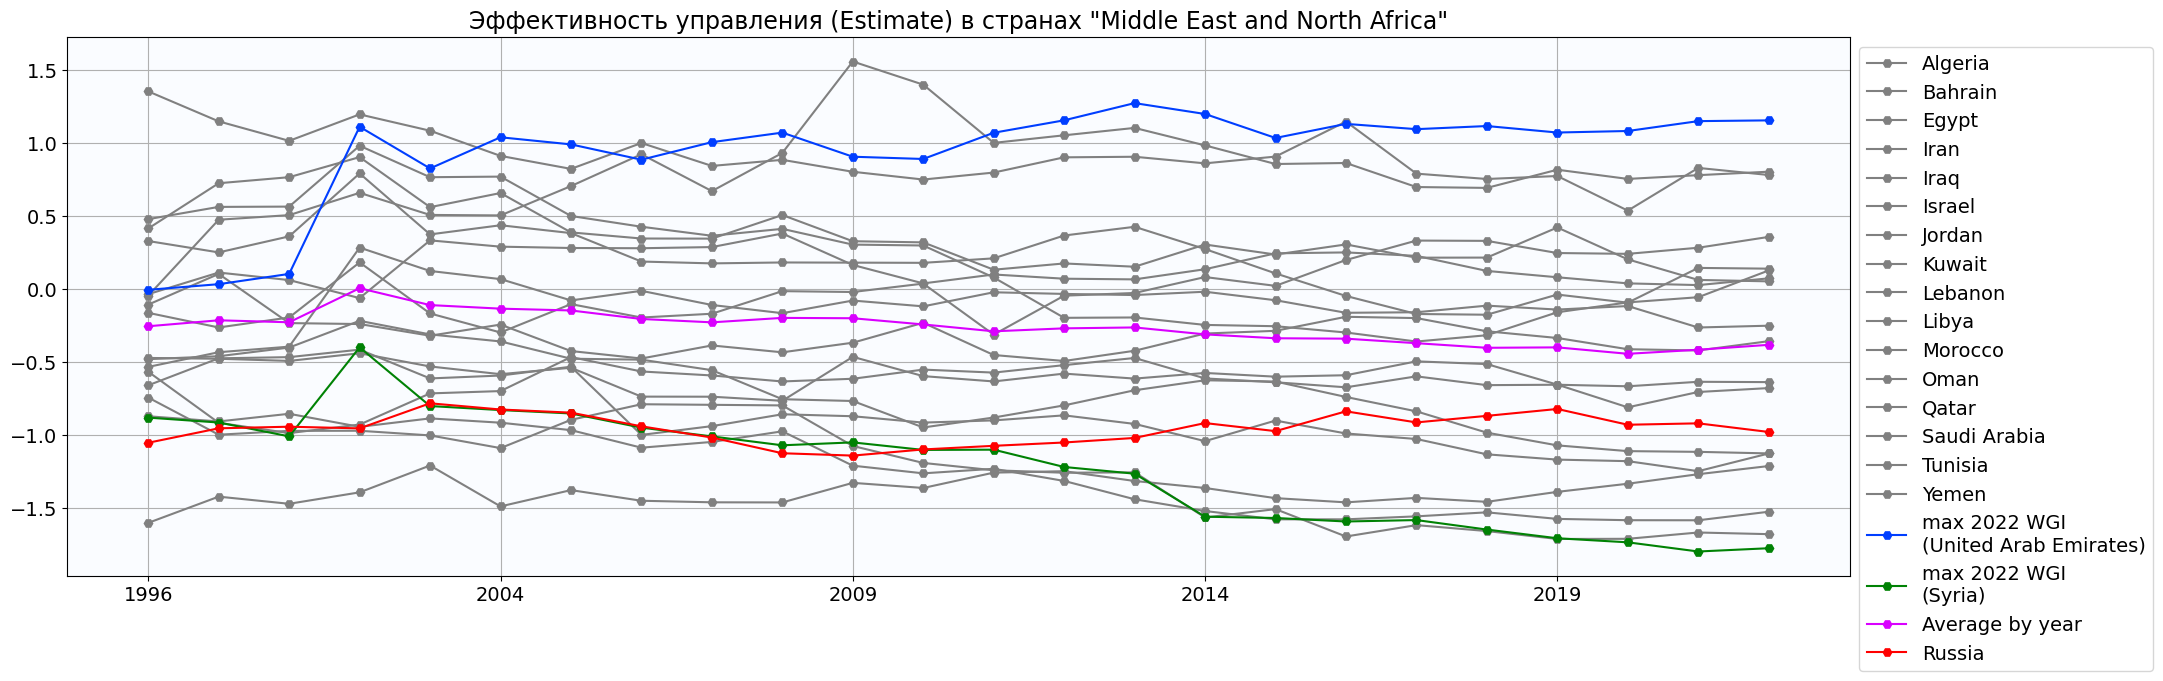

In [19]:
# Построение графика индекса WGI для всех стран региона "Middle East and North Africa" на основе транспонированного датафрейма + установка параметров графика
chart_WGI_all_years=df_MENA_Estimate_WGI.T.drop([max_WGI_country, min_WGI_country], axis= 1).plot(
    color='grey', grid=True,figsize=(23,7), title='Эффективность управления (Estimate) в странах "Middle East and North Africa"', marker='H', fontsize=14)

# Добавляем на график страны с наибольшим и наименьшим значением WGI по региону за 2022 год
df_MENA_Estimate_WGI.loc[[max_WGI_country, min_WGI_country]].T.rename(columns = {max_WGI_country:'max 2022 WGI\n('+max_WGI_country+')', min_WGI_country:'max 2022 WGI\n('+min_WGI_country+')'}).plot(grid=True, marker='H',ax=chart_WGI_all_years,color=['#003eff','#008204'])

# Добавляем на график средние значения WGI региона за каждый год в период с 1996 по 2022
mean_WGI_per_year.plot(grid=True,marker='H', ax=chart_WGI_all_years, label='Average by year', color='#d900ff')

# Добавляем на график данные WGI по России за каждый год в период с 1996 по 2022
df_russia.T.plot(grid=True,marker='H', ax=chart_WGI_all_years, color='red')

chart_WGI_all_years.title.set_size(17)
chart_WGI_all_years.legend(loc='upper left',bbox_to_anchor=(1, 1),fontsize=14)
chart_WGI_all_years.set_facecolor('#fafcff')

Исходя из полученного графика можно сделать вывод, что в период в 1996 по 2022 годы Российский показатель эффективности управления в области контроля над коррупцией ни разу не привысил среднее значение региона "Middle East and North Africa"

### 10. Определите, как изменилось значение показателя `Rank` с 1996 по 2022
---

Для начала соберём нужный датафрейм:
+ Выберем из исходного датафрейма столбец Country и столбцы Rank...Rank.23;
+ Установим в качестве индекса столбец Country;

Далее, с учётом выявленных отсутствующих данных, произведём переименование столбцов Rank...Rank.23 в столбцы 1996, 1998, 2000, 2002...2022

In [20]:
df_rank=df.filter(regex='Rank|Country').set_index('Country/Territory')
# Переименовываем все столбцы Rank в года с учётом отсутствия данных
df_rank.rename(columns = {'Rank':'1996', 'Rank.1':'1998', 'Rank.2':'2000', 'Rank.3':'2002'}, inplace = True)
new_columns = {f'Rank.{i+4}': str(2003 + i) for i in range(20)} # Создаем словарь для замены названий столбцов
df_rank.rename(columns=new_columns, inplace = True)
df_rank

,1996,1998,2000,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country/Territory,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,85.221672,88.292686,88.292686,88.349518,87.378639,...,82.464455,81.730766,88.095238,88.571426,87.619049,87.142860,83.809525,85.238098,78.571426,77.830185
Andorra,87.096771,89.304810,88.297874,87.830688,88.359787,84.236450,88.292686,88.292686,88.349518,87.378639,...,86.729858,87.019234,85.714287,87.142860,86.190475,86.190475,87.142860,88.571426,88.571426,88.679245
Afghanistan,4.301075,8.021390,4.787234,4.761905,4.761905,6.403941,1.463415,1.951220,0.970874,0.485437,...,0.947867,5.288462,5.714286,3.809524,3.809524,4.761905,5.714286,4.761905,12.380953,12.264151
Angola,9.677420,7.486631,8.510638,7.936508,5.291005,5.911330,6.341464,7.804878,5.339806,4.368932,...,4.739336,3.846154,4.285714,4.761905,5.714286,10.952381,13.809524,18.571428,29.047619,30.660378
Anguilla,NaN,NaN,NaN,NaN,NaN,78.325127,88.292686,88.292686,88.349518,87.378639,...,86.729858,87.019234,85.714287,87.142860,86.190475,86.190475,87.142860,73.809525,73.333336,88.679245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Serbia,11.827957,6.417112,9.042553,23.280424,39.153439,35.467979,42.439026,46.829269,45.145630,47.572815,...,46.445499,50.480770,46.190475,42.380951,41.904762,40.476189,37.619049,37.142857,35.714287,35.377357
South Africa,76.344086,72.727272,70.212769,67.195770,64.550262,69.458130,69.268295,69.756096,61.650486,62.135921,...,54.502369,54.326923,54.761906,57.142857,52.380951,52.380951,54.285713,53.333332,53.809525,44.811321
"Congo, Dem. Rep.",0.000000,1.069519,0.531915,1.058201,1.058201,3.448276,1.951220,0.975610,3.883495,4.854369,...,4.265403,6.730769,7.619048,6.666667,5.238095,3.809524,3.333333,2.380952,4.285714,3.301887


Для вычисления процентного изменения между значениями Rank в 1996 и 2022 годах необходимо избавиться от пустых(нулевых и NaN) значений в 1996 году.

Для того, чтобы избежать значений "inf" заменим нули на NaN, после чего с помощью сдвига заменим NaN на ближайшие значения по временной цепочке.

Для определения того, как изменилось значение показателя Rank с 1996 по 2022 годы по странам воспользуемся функцией `pct_change()`, которая предназначена для расчета процентного изменения между значениями.

Также рассчитаем обычную разницу между Rank 2022 и Rank 1996

In [21]:
# Замена нулей и NaN значений в датафрейме и выбор данных за 1996 и 2022 г.
df_rank=df_rank.replace(0, np.nan).bfill(axis=1)[['1996','2022']]
# Формирование набора данных с изменениями значений Rank с 1996 по 2022 по странам
df_rank_btwn_1996_2022=pd.concat([(df_rank['2022']-df_rank['1996']).round(3),df_rank.pct_change(axis=1)["2022"].round(3)], axis=1)
# Переименование столбцов
df_rank_btwn_1996_2022.columns =['change', 'percentage change']
df_rank_btwn_1996_2022

,change,percentage change
Country/Territory,,
Aruba,-7.391,-0.087
Andorra,1.582,0.018
Afghanistan,7.963,1.851
Angola,20.983,2.168
Anguilla,10.354,0.132
...,...,...
Serbia,23.549,1.991
South Africa,-31.533,-0.413
"Congo, Dem. Rep.",2.232,2.087


Построим гистограмму распределения показателя изменения значения Rank с 1996 по 2022

Text(4.776999999999999, -0.0015, 'Q3')

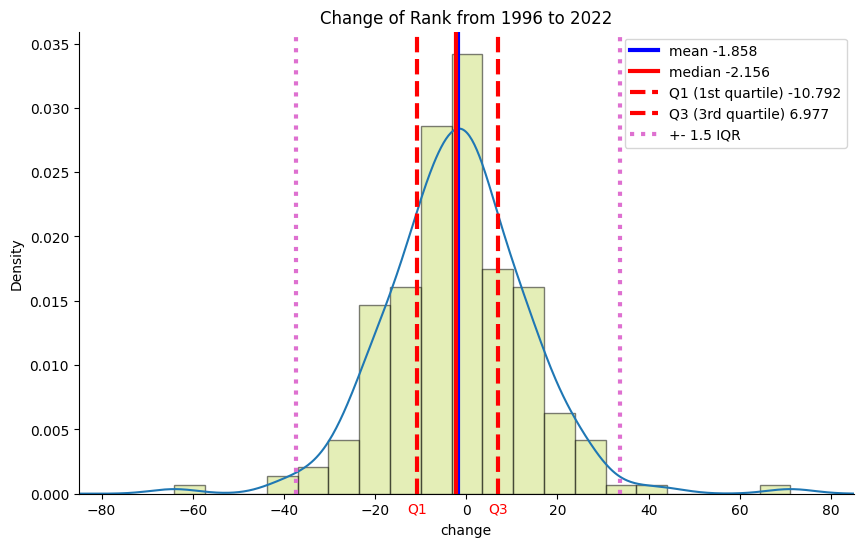

In [22]:
chart_df_rank_1996_2022=df_rank_btwn_1996_2022['change'].plot(kind='hist', density=True,bins=20, title='Change of Rank from 1996 to 2022', label='', figsize=(10,6), color='#cade70', edgecolor = 'black', alpha=0.5)
df_rank_btwn_1996_2022['change'].plot.kde(ax=chart_df_rank_1996_2022, label='')

# Ограничим значения по оси Х и уберём верхнюю и правую границы графика
plt.xlim (-85, 85)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Рассчитаем квартили и межквартильный размах
Q1=df_rank_btwn_1996_2022['change'].quantile(.25)
Q2=df_rank_btwn_1996_2022['change'].median()
Q3=df_rank_btwn_1996_2022['change'].quantile(.75)
IQR=Q3-Q1

# Отобразим среднее значение, квартили и границы Q1-1.5*IQR и Q3+1.5*IQR
plt.axvline(x=df_rank_btwn_1996_2022['change'].mean(), color='b', label=f'mean {df_rank_btwn_1996_2022["change"].mean().round(3)}', lw=3)
plt.axvline(x=Q2, color='r', label=f'median {Q2.round(3)}', lw=3)
plt.axvline(x=Q1, color='r',linestyle='--', label=f'Q1 (1st quartile) {Q1.round(3)}', lw=3)
plt.axvline(x=Q3, color='r',linestyle='--', label=f'Q3 (3rd quartile) {Q3.round(3)}', lw=3)
plt.axvline(x=Q3+1.5*IQR, color='#de70d0',linestyle='dotted', label='', lw=3)
plt.axvline(x=Q1-1.5*IQR, color='#de70d0',linestyle='dotted', label='+- 1.5 IQR', lw=3)

# Отобразим текстувую информацию
plt.legend()
plt.xlabel('change')
plt.text(df_rank_btwn_1996_2022["change"].quantile(.25)-2.2, -0.0015, "Q1", color ='r')
plt.text(df_rank_btwn_1996_2022["change"].quantile(.75)-2.2, -0.0015, "Q3", color ='r')

Как можно видеть, изменение парметра Rank по странам с 1996 по 2022 (разница значений 2022 и 1996 годов) имеет нормальное распределение.

+ Q1 (первый квартиль) = -10.792
+ Q2 (второй квартиль) = -2.156
+ Q3 (третий квартиль) = 6.977
+ IQR=Q3-Q1=17.769

Определим страны, значения которых не попали в межквартильный размах:

In [23]:
df_rank_btwn_1996_2022.loc[(df_rank_btwn_1996_2022['change']>Q3+1.5*IQR) | (df_rank_btwn_1996_2022['change']<Q1-1.5*IQR)]

,change,percentage change
Country/Territory,,
Eritrea,-64.024,-0.889
Georgia,71.095,66.118
Kazakhstan,36.219,2.929
Rwanda,43.401,1.615
Trinidad and Tobago,-40.079,-0.497
Zimbabwe,-39.359,-0.823


### 11. Выведите таблицу для **Вашего варианта** (WGI - rank)

  **Вариант №1:** Регион "Asia Pacific"

---

Как было описано ранее, не все страны из набора данных WGI есть в наборе Регионов, а также в результате соединения двух наборов возникает три ошибки соединения из-за несовпадения кодов стран.

В данном случае страна Timor-Leste из региона "Asia Pacific" имеет различные коды вы исходных датафреймах.

|Страна|Код в regions.xlsx|Код в wgidataset.xlsx|
|-|-|-|
|Timor-Leste|TLS|TMP|

Для решения этой пролемы заменим код страны в наборе данных Регионы.

Далее осуществим соединение наборов данных Регионов и WGI по столбцу `Code`.

In [24]:
# Замена кода Timor-Leste в таблице Регионов с TLS на TMP
df_regions.loc[df_regions['Code']=='TLS',['Code']]='TMP'
# Соединение датафреймов по значению столбца Code
df_merged_ALL = pd.merge(df_regions, df, how='inner',on='Code')
df_merged_AP = df_merged_ALL.loc[df_merged_ALL['Region'] == 'AP'] # Фильтрация стран по региону AP
print(f'Количество стран в регионе "Asia Pacific": {df_merged_AP.shape[0]}') # Получение количества стран в регионе
df_merged_AP

Количество стран в регионе "Asia Pacific": 31


,Country,Code,Region,Country/Territory,Estimate,StdErr,NumSrc,Rank,Lower,Upper,...,NumSrc.22,Rank.22,Lower.22,Upper.22,Estimate.23,StdErr.23,NumSrc.23,Rank.23,Lower.23,Upper.23
0,Afghanistan,AFG,AP,Afghanistan,-1.291705,0.340507,2.0,4.301075,0.000000,27.419355,...,8.0,12.380953,4.761905,20.952381,-1.183776,0.173320,8.0,12.264151,4.716981,20.283018
6,Australia,AUS,AP,Australia,1.877356,0.210325,6.0,93.548386,90.322578,99.462364,...,9.0,94.761902,89.047623,96.666664,1.764490,0.162881,9.0,95.283020,89.622643,97.169815
11,Bangladesh,BGD,AP,Bangladesh,-0.969682,0.262077,4.0,17.741936,2.688172,34.946236,...,12.0,18.095238,10.952381,26.190475,-1.075527,0.153577,12.0,15.566038,7.075472,21.698112
16,Bhutan,BTN,AP,Bhutan,0.942838,0.340507,2.0,81.182793,66.129036,90.322578,...,7.0,90.476189,84.285713,95.714287,1.514259,0.200353,7.0,90.094337,83.962265,95.754715
25,Cambodia,KHM,AP,Cambodia,-1.019842,0.275614,3.0,16.129032,2.150538,32.795700,...,11.0,11.428572,4.761905,18.571428,-1.241499,0.158586,11.0,9.905661,4.245283,18.867924
31,China,CHN,AP,China,-0.271190,0.188622,7.0,48.387096,32.258064,58.602150,...,10.0,56.190475,48.095238,62.380951,0.015970,0.153877,10.0,55.188679,48.113209,62.264153
53,Fiji,FJI,AP,Fiji,0.659303,0.340507,2.0,73.655914,59.677418,84.408600,...,4.0,65.714287,54.285713,80.476189,0.388570,0.290792,5.0,64.622643,51.415092,79.245285
69,Hong Kong,HKG,AP,"Hong Kong SAR, China",1.444894,0.204951,6.0,89.784943,81.182793,93.010750,...,9.0,94.285713,89.047623,96.190475,1.610646,0.162881,9.0,92.452827,89.150940,95.754715
72,India,IND,AP,India,-0.381090,0.188622,7.0,43.010754,29.569893,53.763439,...,12.0,45.238094,31.904762,50.476189,-0.321811,0.147102,12.0,44.339622,32.547169,51.886791
73,Indonesia,IDN,AP,Indonesia,-0.864106,0.188622,7.0,22.043011,8.602151,34.408604,...,12.0,36.666668,27.619047,48.095238,-0.434911,0.147102,12.0,37.735847,26.415094,48.113209


In [25]:
# Создание таблицы
df_table = pd.DataFrame(index=['mean_2022', 'max_2022', 'min_2022', 'Russia_2022'],
                        columns=['Регион', 'Страна', 'WGI 1996', 'WGI 2022', 'Изменение'])

# Подсчитаем средние значения для Rank в 1996 и 2022 годах, а также определим
# страны с максимальным и минимальным Rank в регионе "Asia Pacific" в 2022 году
mean_Rank_1996=df_merged_AP['Rank'].mean()
mean_Rank_2022=df_merged_AP['Rank.23'].mean()
max_Rank_2022=df_merged_AP['Country'][df_merged_AP['Rank.23'].idxmax()]
min_Rank_2022=df_merged_AP['Country'][df_merged_AP['Rank.23'].idxmin()]

# Найдём значения Rank в 1996 и 2022 годах для России и стран с
# максимальным и минимальным Rank в регионе "Asia Pacific" в 2022 году
rus_rank_1996 = df_merged_ALL.loc[df_merged_ALL['Country']=='Russia','Rank'].values[0]
rus_rank_2022 = df_merged_ALL.loc[df_merged_ALL['Country']=='Russia','Rank.23'].values[0]
rank_1996_min = df_merged_AP.loc[df_merged_AP['Country']==min_Rank_2022,'Rank'].values[0]
rank_1996_max = df_merged_AP.loc[df_merged_AP['Country']==max_Rank_2022,'Rank'].values[0]
rank_2022_min = df_merged_AP.loc[df_merged_AP['Country']==min_Rank_2022,'Rank.23'].values[0]
rank_2022_max = df_merged_AP.loc[df_merged_AP['Country']==max_Rank_2022,'Rank.23'].values[0]

# Заполняем таблицу
df_table['Регион'] = ["AP", "AP", "AP", df_merged_ALL.loc[df_merged_ALL['Country']=='Russia','Region'].values[0]]
df_table['Страна'] = ['', max_Rank_2022, min_Rank_2022, "Russia"]
df_table['WGI 1996'] = [mean_Rank_1996, rank_1996_max, rank_1996_min, rus_rank_1996]
df_table['WGI 2022'] = [mean_Rank_2022, rank_2022_max, rank_2022_min, rus_rank_2022]
df_table['Изменение'] = [mean_Rank_2022-mean_Rank_1996, rank_2022_max-rank_1996_max, rank_2022_min-rank_1996_min, rus_rank_2022-rus_rank_1996]


df_table

,Регион,Страна,WGI 1996,WGI 2022,Изменение
mean_2022,AP,,50.197133,49.087036,-1.110097
max_2022,AP,New Zealand,97.849464,99.056602,1.207138
min_2022,AP,"Korea, North",4.838710,2.358490,-2.480219
Russia_2022,ECA,Russia,15.053763,19.339622,4.285859


### 12. Отобразите диаграмму размаха (boxplot) индекса WGI (столбец Estimate) за 2022 для всех стран и для каждого региона в отдельности (на одном графике)

---

Для начала соберём отдельно наборы данных для всех стран и по каждому из регионов с нужными полями.

In [26]:
# В исходной таблице поменяем индекс
df_merged_ALL.set_index('Country/Territory', inplace=True)

In [27]:
# собираем отдельные наборы данных
df_ALL_reg = df_merged_ALL.filter(regex='Estimate.23|Country/Territory').rename(columns={'Estimate.23': 'all_countries'})
df_MENA_reg = df_merged_ALL[df_merged_ALL.Region=='MENA'].filter(regex='Estimate.23|Country/Territory').rename(columns={'Estimate.23': 'MENA_countries'})
df_WE_EU_reg = df_merged_ALL[df_merged_ALL.Region=='WE/EU'].filter(regex='Estimate.23|Country/Territory').rename(columns={'Estimate.23': 'WE/EU_countries'})
df_AP_reg = df_merged_ALL[df_merged_ALL.Region=='AP'].filter(regex='Estimate.23|Country/Territory').rename(columns={'Estimate.23': 'AP_countries'})
df_ECA_reg = df_merged_ALL[df_merged_ALL.Region=='ECA'].filter(regex='Estimate.23|Country/Territory').rename(columns={'Estimate.23': 'ECA_countries'})
df_AME_reg = df_merged_ALL[df_merged_ALL.Region=='AME'].filter(regex='Estimate.23|Country/Territory').rename(columns={'Estimate.23': 'AME_countries'})
df_SSA_reg = df_merged_ALL[df_merged_ALL.Region=='SSA'].filter(regex='Estimate.23|Country/Territory').rename(columns={'Estimate.23': 'SSA_countries'})

In [28]:
# из отдельных наборов данных делаем датафрейм для построения боксплотов
df_all_frames = pd.concat([df_MENA_reg, df_WE_EU_reg, df_AP_reg, df_ECA_reg,df_AME_reg, df_SSA_reg, df_ALL_reg], sort = True)
df_all_frames

,AME_countries,AP_countries,ECA_countries,MENA_countries,SSA_countries,WE/EU_countries,all_countries
Country/Territory,,,,,,,
Algeria,NaN,NaN,NaN,-0.637930,NaN,NaN,NaN
Bahrain,NaN,NaN,NaN,0.139386,NaN,NaN,NaN
"Egypt, Arab Rep.",NaN,NaN,NaN,-0.678810,NaN,NaN,NaN
"Iran, Islamic Rep.",NaN,NaN,NaN,-1.126373,NaN,NaN,NaN
Iraq,NaN,NaN,NaN,-1.212934,NaN,NaN,NaN
...,...,...,...,...,...,...,...
"Venezuela, RB",NaN,NaN,NaN,NaN,NaN,NaN,-1.651137
Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,-0.287283
"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,-1.679558


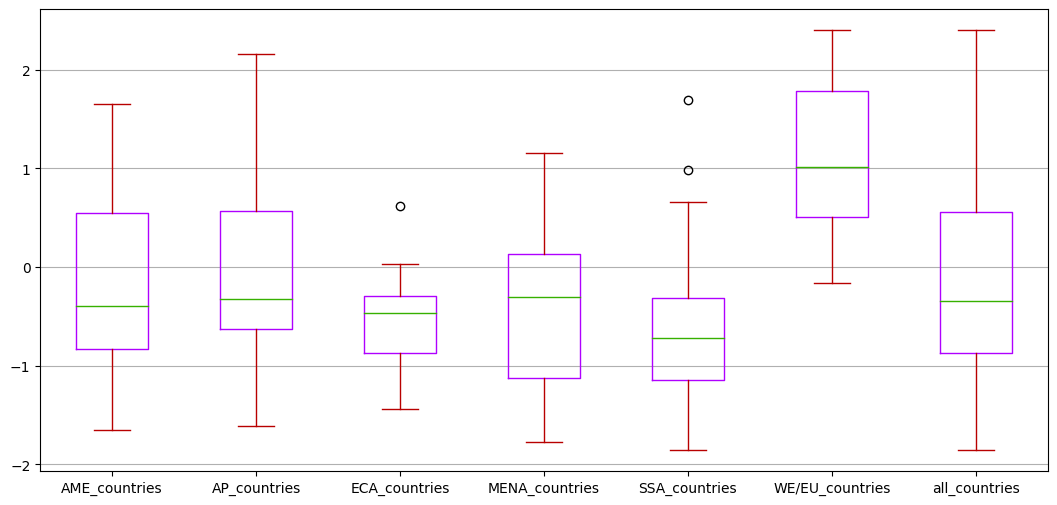

In [29]:
df_box = pd.concat([df_MENA_reg, df_WE_EU_reg, df_AP_reg, df_ECA_reg,df_AME_reg, df_SSA_reg, df_ALL_reg], sort = True)

color_settings = dict(boxes = "#af00ff", whiskers = "#b80000", medians = "#37b000", caps = "#b80000")

bxs=df_box.plot(kind='box',figsize=(13,6),color=color_settings, grid=False)
bxs.grid(axis='y')

## **Задание 2.**  Анализ рынка акций

---

### 1. Загрузите данные в один dataframe из всех файлов в папке /data/stock. Все файлы имеют одинаковую структуру, в том числе наименование столбцов. В качестве значений индекса dataframe'а необходимо указать значения столбца "Date". Название столбцов должные соответствовать названию акций (имя файла без .csv), а их значения - значениям цены закрытия (столбец "Close" в файлах .csv)
---

Для начала импортируем библиотеку glob, которая используется для поиска файлов, соответствующих шаблону

In [30]:
import glob

Далее для чтения всех CSV-файлов из определенного каталога используемфункцию glob, которая возвращает список всех файлов, соответствующих заданному шаблону.

После чего создадим пустой список и наполним его датафреймами, полученными в результате последовательного чтения каждого из файлов.

После наполнения списка объединим все датафреймы в один с помощью функции `concat`

In [31]:
# Получение всех csv из нужного каталога
path = '/content/drive/MyDrive/ML_BMSTU/HomeTask_1/stoks'
filenames = glob.glob(path + "/*.csv")

# список для датафреймов
list_of_dfs = []
# чтение всех файлов
for filename in filenames:
    df_stock=pd.read_csv(filename).filter(regex='Date|^Close').set_index('Date') # Для каждого датафрейма оставляем нужные столбцы и Date делаем индексом
    stock_name=filename.split('/')[-1].split('.')[0]    # Получаем название акции из имени файла
    df_stock.columns = [stock_name]   # Столбцы переименовываем в названия акций
    list_of_dfs.append(df_stock)

# соединение датафреймов в один
stocks_frame = pd.concat(list_of_dfs, axis=1)
stocks_frame

,AAPL,ABNB,ADBE,AMZN,CSCO,DBX,EBAY,GOOGL,GTLB,HPQ,...,NVDA,ORCL,PINS,SHOP,SPOT,TCOM,TSLA,TWLO,UBER,XIACY
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,174.779999,153.970001,534.299988,149.573502,55.669998,24.750000,60.070000,135.303497,64.010002,36.730000,...,244.860001,81.160004,29.559999,NaN,196.259995,26.610001,312.239990,206.119995,37.400002,10.7350
2022-02-01,165.119995,151.490005,467.679993,153.563004,55.770000,22.690001,54.590000,135.057007,58.270000,34.360001,...,243.850006,75.970001,26.750000,NaN,156.190002,25.820000,290.143341,174.800003,36.029999,9.5500
2022-03-01,174.610001,171.759995,455.619995,162.997498,55.759998,23.250000,57.259998,139.067505,54.450001,36.299999,...,272.859985,82.730003,24.610001,NaN,151.020004,23.120001,359.200012,164.809998,35.680000,8.7199
2022-04-01,157.649994,153.210007,395.950012,124.281502,48.980000,21.750000,51.919998,114.109497,47.930000,36.630001,...,185.470001,73.400002,20.520000,NaN,101.650002,23.650000,290.253326,111.820000,31.480000,7.5400
2022-05-01,148.839996,120.870003,416.480011,120.209503,45.049999,20.840000,48.669998,113.762001,38.939999,38.840000,...,186.720001,71.919998,19.650000,NaN,112.769997,22.059999,252.753326,105.169998,23.200001,7.6300
2022-06-01,136.720001,89.080002,366.059998,106.209999,42.639999,20.990000,41.669998,108.962997,53.139999,32.779999,...,151.589996,69.870003,18.160000,NaN,93.830002,27.450001,224.473328,83.809998,20.459999,8.6300
2022-07-01,162.509995,110.980003,410.119995,134.949997,45.369999,22.740000,48.630001,116.320000,57.400002,33.389999,...,181.630005,77.839996,19.480000,NaN,113.019997,25.780001,297.149994,84.800003,23.450001,7.8900
2022-08-01,157.220001,113.120003,373.440002,126.769997,44.720001,21.389999,44.130001,108.220001,59.869999,28.709999,...,150.940002,74.150002,23.040001,NaN,108.150002,25.719999,275.609985,69.580002,28.760000,7.1900
2022-09-01,138.199997,105.040001,275.200012,113.000000,40.000000,20.719999,36.810001,95.650002,51.220001,24.920000,...,121.389999,61.070000,23.299999,NaN,86.300003,27.309999,265.250000,69.139999,26.500000,5.5800


В результате был получен набор цен закрытия (Close) по 25 акциям на 28 дней

### 2. Рассчитайте корреляционную матрицу для всех акций

___

Матрица корреляции — это распространенный инструмент, используемый для сравнения коэффициентов корреляции между различными объектами в наборе данных. Она позволяет визуализировать, насколько велика (или насколько мала) корреляция между различными переменными.

**Коэффициент корреляции** — это значение между (-1) и (+1), которое обозначает как силу, так и направленность связи между двумя переменными.
+ Чем ближе значение к 1 (или -1), тем сильнее связь.
+ Чем ближе число к 0, тем слабее связь.

При значениях коэффициента меньше 0 говорят об обратной (отрицательной) корреляции. Для фондового рынка это означает, что котировки исследуемых активов движутся разнонаправленно: при росте цены одного второй дешевеет, и наоборот.
Аналогичным образом, положительный коэффициент указывает на то, что с увеличением одного значения увеличивается и другое.

Для оценки силы связи абсолютного значения коэффициента корреляции часто принято использовать шкалу Чеддока:

|Абсолютное значение|Интерпретация|
|-|-|
|от 0 до 0.3|очень слабая|
|от 0.3 до 0.5|слабая|
|от 0.5 до 0.7|средняя|
|от 0.7 до 0.9|высокая|
|от 0.9 до 1|очень высокая|

Существует несколько распространённых способов измерения корреляции:
+ Корреляция Пирсона — используется для измерения корреляции между двумя непрерывными переменными (например, рост и вес);
+ Корреляция Спирмена — используется для измерения корреляции между двумя ранжированными переменными;
+ Корреляция Кендалла — используется, когда необходимо использовать корреляцию Спирмена, но размер выборки мал.

Исходя из вышесказанного, для оценки корреляции доходности ценных бумаг принято использовать формулу Пирсона.

Сам же анализ корреляции ценнных бумаг позволяет:
+ Организовать поиск подходящих активов для диверсификации. Согласно портфельной теории, лучшим выбором являются бумаги с нулевой связью, поэтому инвесторам приходится искать активы с низкими значениями коэффициента корреляции. Как правило, это приводит к формированию набора инструментов из разных отраслей и даже стран, что существенно снижает риски инвестора даже в условиях кризисов;
+ Бумаги с отрицательным коэффициентом корреляции используются для взаимного хеджирования. В этом случае при правильном подборе весов убыток от одного актива полностью компенсируется прибылью от второго. При этом за счет динамики и цен бумаг, и самой связи возможно получение положительного результата в целом.

In [32]:
#созданние корреляционной матрицы
stocks_сore=stocks_frame.corr(method='pearson')
stocks_сore.style.background_gradient(cmap='coolwarm',axis=None)

,AAPL,ABNB,ADBE,AMZN,CSCO,DBX,EBAY,GOOGL,GTLB,HPQ,INTC,META,MSFT,MU,NFLX,NVDA,ORCL,PINS,SHOP,SPOT,TCOM,TSLA,TWLO,UBER,XIACY
AAPL,1.000000,0.617430,0.833129,0.665715,0.589552,0.740429,0.115591,0.806847,0.282373,0.067074,0.507251,0.705358,0.790691,0.606787,0.701937,0.633114,0.769309,0.640294,0.465147,0.687415,0.439363,0.248385,0.042914,0.661323,0.408747
ABNB,0.617430,1.000000,0.670509,0.830690,0.594365,0.332740,0.644140,0.780440,0.460602,0.390153,0.738241,0.723419,0.679204,0.842928,0.646901,0.649664,0.471504,0.554616,0.696599,0.753797,0.294269,0.353807,0.429915,0.680764,0.564475
ADBE,0.833129,0.670509,1.000000,0.819614,0.554172,0.816359,0.180354,0.915440,0.496556,0.081518,0.713875,0.873388,0.913842,0.817961,0.821314,0.802739,0.785432,0.804657,0.783919,0.863827,0.533298,0.071508,0.067604,0.834611,0.697612
AMZN,0.665715,0.830690,0.819614,1.000000,0.404820,0.478171,0.434078,0.912332,0.690644,0.235247,0.816519,0.830910,0.838702,0.906932,0.735466,0.765294,0.534556,0.666996,0.824934,0.875779,0.309545,0.302321,0.314869,0.796897,0.654564
CSCO,0.589552,0.594365,0.554172,0.404820,1.000000,0.496982,0.494938,0.600025,0.068856,0.214262,0.420854,0.374998,0.391476,0.472688,0.497727,0.320159,0.463955,0.384233,-0.144612,0.424007,0.257188,0.253808,0.383777,0.326346,0.474311
DBX,0.740429,0.332740,0.816359,0.478171,0.496982,1.000000,-0.157363,0.669228,0.402517,-0.177013,0.390625,0.552874,0.648164,0.440043,0.635239,0.519374,0.667833,0.710191,0.424923,0.525305,0.423136,0.037233,-0.113102,0.595928,0.382992
EBAY,0.115591,0.644140,0.180354,0.434078,0.494938,-0.157363,1.000000,0.375794,0.251066,0.744560,0.580047,0.190361,0.127010,0.512637,0.138580,0.087027,-0.070414,-0.002757,0.338672,0.296858,-0.149330,0.434899,0.753732,0.085736,0.535223
GOOGL,0.806847,0.780440,0.915440,0.912332,0.600025,0.669228,0.375794,1.000000,0.535473,0.263251,0.826042,0.808784,0.845993,0.867191,0.717756,0.715287,0.618983,0.640675,0.824313,0.821587,0.322718,0.326662,0.315410,0.737311,0.680658
GTLB,0.282373,0.460602,0.496556,0.690644,0.068856,0.402517,0.251066,0.535473,1.000000,0.094128,0.535441,0.467641,0.451366,0.543109,0.452625,0.404702,0.138574,0.525458,0.855342,0.540113,0.103614,0.260908,0.310273,0.521399,0.453669
HPQ,0.067074,0.390153,0.081518,0.235247,0.214262,-0.177013,0.744560,0.263251,0.094128,1.000000,0.591406,-0.035611,-0.034581,0.308473,-0.203337,-0.160502,-0.260316,-0.285950,0.436406,0.005774,-0.443806,0.568231,0.728572,-0.180970,0.378627


В результате была рассчитана матрица корреляции Пирсона для всех акций

### 3. Отобразите корреляционную матрицу в виде диаграммы.
___

Для отображения корреляционной матрицы в виде диаграммы испортируем бибилиотеку `seaborn` (библиотека визуализации данных, основанная на библиотеке `Matplotlib`)

In [33]:
import seaborn as sns #подключение библиотеки визуализации

<Axes: title={'center': 'Корреляционная матрица'}>

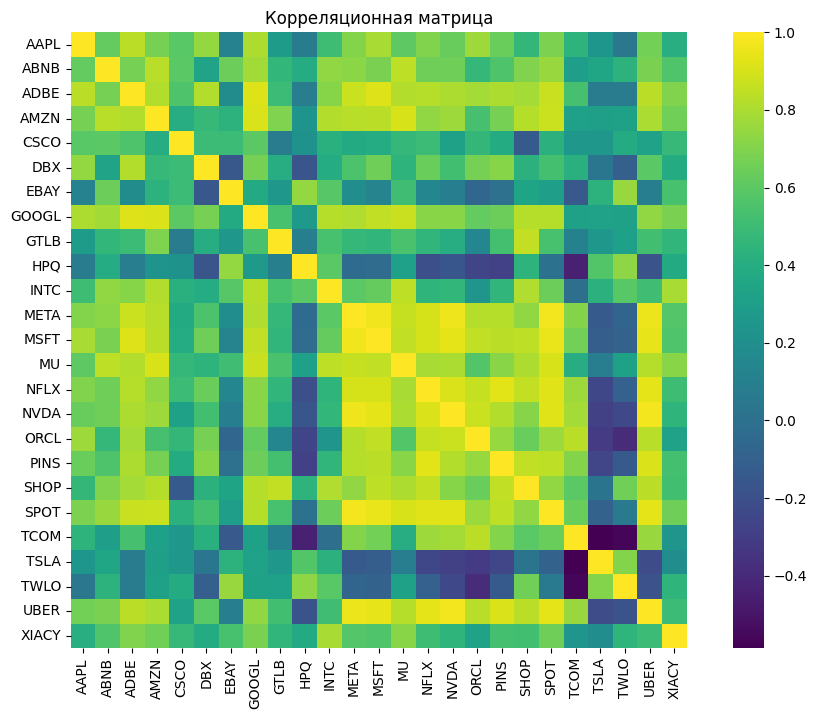

In [34]:
plt.figure(figsize = (12,8))
plt.title("Корреляционная матрица")
sns.heatmap(stocks_сore, annot = False, square = True, cmap="viridis") #отображение корреляционной матрицы диаграммой

В данном случае очень важно оговориться, что мы знаем, что коэффициент корреляции может принимать значения от -1 до +1, а в нашем случае, за счёт того, что в корреляционной матрице нет отрицательных значений, близких к -1 мы видим негативные значения сильнее, чем они есть на самом деле. То есть значение -0.5 выделяется так, как должно выделяться значение -1.

Для того, чтобы цвета корректнее отображали коэффициенты установим дополнитедльные параметры:
+ `vmin=`, `vmax=` используются для привязки цветовой карты. Поскольку мы знаем, что коэффициенты или корреляция должны быть привязаны к значениям +1 и -1, мы можем передать их.
+ `center=` определяет значение, по которому центрируется цветовая карта, когда мы отображаем расходящиеся данные. Поскольку мы хотим, чтобы цвета отличались от 0, нам следует указать здесь 0 в качестве аргумента.

<Axes: title={'center': 'Корреляционная матрица'}>

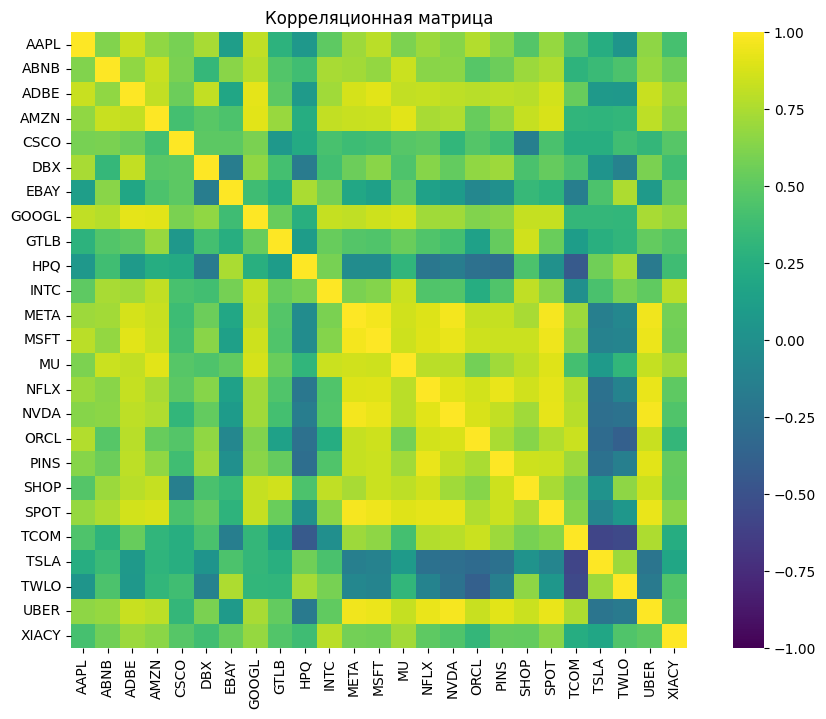

In [35]:
plt.figure(figsize = (12,8))
plt.title("Корреляционная матрица")
sns.heatmap(stocks_сore, annot = False, square = True, cmap="viridis", vmax=1, vmin=-1, center=0) #отображение корреляционной матрицы диаграммой с настроенный градиентом

### 4. В соответствии с Вашим вариантом определите:

+ акцию с максимальной положительной корреляцией (max)
+ акцию с максимальной отрицательной корреляцией (min)
+ акцию с минимальной корреляцией [которая больше всего соответствует отсутствию какой-либо корреляции (none)]

  **Вариант №3:** Google (GOOGL)
---

Для определения акций с максимальными положительными и отрицательными корреляциями, а также с минимальной корреляцией с ценной бумагой Google (GOOGL) удалим все столбцы кроме Google из матрицы корреляции.
Также удалим строку "Google", чтобы не анализировать корреляцию акции самой с собой.

Для начала определим в целом минимальное и максимальное значение в столбце Google, чтобы определить, есть ли значения отрицательной и положительной корреляции.

In [36]:
df_Google = stocks_сore['GOOGL'] # Выбрали столбец акции Google из матрицы корреляции
df_Google.drop(index='GOOGL', inplace=True) # Удаление строки Google
df_Google

AAPL     0.806847
ABNB     0.780440
ADBE     0.915440
AMZN     0.912332
CSCO     0.600025
DBX      0.669228
EBAY     0.375794
GTLB     0.535473
HPQ      0.263251
INTC     0.826042
META     0.808784
MSFT     0.845993
MU       0.867191
NFLX     0.717756
NVDA     0.715287
ORCL     0.618983
PINS     0.640675
SHOP     0.824313
SPOT     0.821587
TCOM     0.322718
TSLA     0.326662
TWLO     0.315410
UBER     0.737311
XIACY    0.680658
Name: GOOGL, dtype: float64

In [37]:
min_df_Google=df_Google.min() # Минимальное значение в столбце Google
max_df_Google=df_Google.max() # Максимальное значение в столбце Google
print(f'Минимальное значение в столбце Google матрицы корреляции: {min_df_Google}')
print(f'Максимальное значение в столбце Google матрицы корреляции: {max_df_Google}')

Минимальное значение в столбце Google матрицы корреляции: 0.26325105255196485
Максимальное значение в столбце Google матрицы корреляции: 0.9154401132057839


**<h4>Как оказалось, ни одна акция не имеет отрицательной корреляции с акцией Google. </h4>**

Таким образом, мы имеем:
+ максимальным положительным значением корреляции является *0.9154401132057839*
+ максимально близким значением к отсутствию корреляции является *0.26325105255196485*


Получается, что в **Варианте №3 [Google (GOOGL)]** нет вообще никакой отрицательной корреляции, поэтому будет определено только две акции:

1.   акция с максимально положительной корреляцией
2.   акция с минимальной корреляцией

Для поиска этих акций используем функции `idxmin()` и `idxmax()`, которые применяли ранее в *Задании №1*.

In [38]:
min_cor_comp=df_Google.idxmin()
max_cor_comp=df_Google.idxmax()
print(f'Компания {min_cor_comp} меньше всех коррелирует с Google: {min_df_Google}')
print(f'Компания {max_cor_comp} имеет максимальную положительную корреляцию с Google: {max_df_Google}')

Компания HPQ меньше всех коррелирует с Google: 0.26325105255196485
Компания ADBE имеет максимальную положительную корреляцию с Google: 0.9154401132057839


### 5. Постройте диаграммы разброса (Ваша компания - Компания с min), (Ваша компания - Компания с max), (Ваша компания - Компания с none)
---

Как уже было определено, в **Варианте №3 [Google (GOOGL)]** нет вообще никакой отрицательной корреляции, поэтому будет построено две диаграммы разброса:

1.   Ваша компания - Компания с максимальной положительной корреляцией
2.   Ваша компания - Компания с минимальной корреляцией


Text(0.5, 1.0, 'Диаграмма рассеивания Google с компанией ADBE с максимальной положит. корреляцией 0.915')

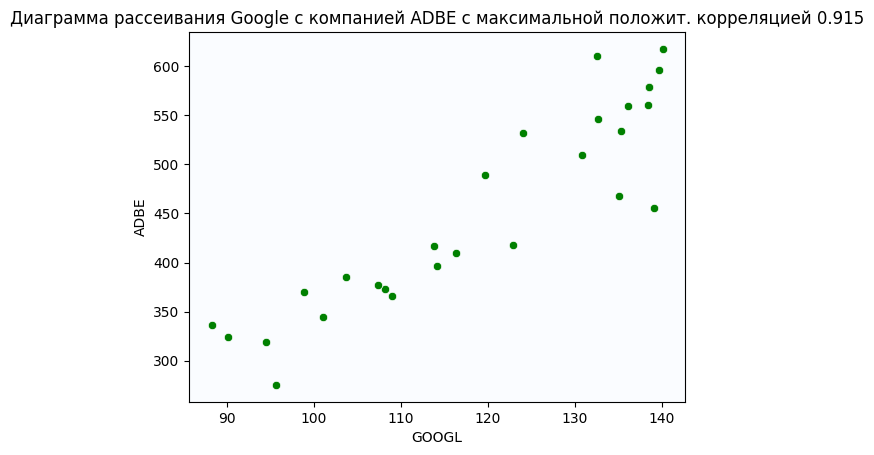

In [39]:
ax=sns.scatterplot(x='GOOGL',y=max_cor_comp,data=stocks_frame, color='g')
ax.set_facecolor('#fafcff')
plt.title(f'Диаграмма рассеивания Google с компанией {max_cor_comp} с максимальной положит. корреляцией {max_df_Google.round(3)}')

Text(0.5, 1.0, 'Диаграмма рассеивания Google с компанией HPQ с минимальной корреляцией 0.263')

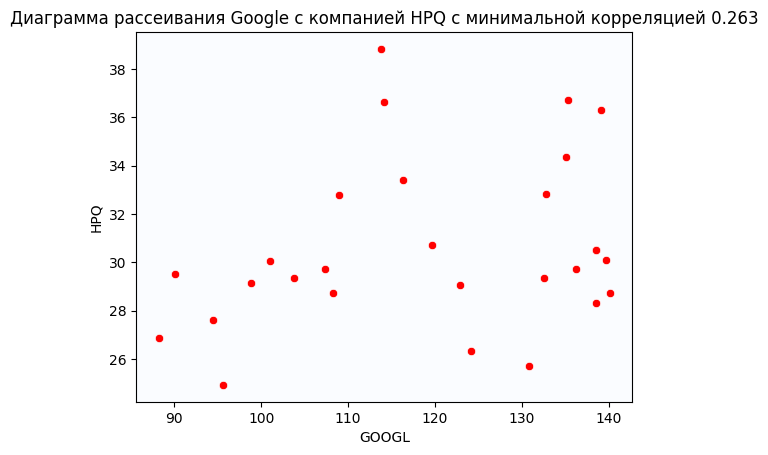

In [40]:
ax=sns.scatterplot(x='GOOGL',y=min_cor_comp,data=stocks_frame, color='r')
ax.set_facecolor('#fafcff')
plt.title(f'Диаграмма рассеивания Google с компанией {min_cor_comp} с минимальной корреляцией {min_df_Google.round(3)}')

Как мы можем видеть по диаграммам рассеивания, действительно GOOGL сильно положительно коррелирует с ADBE и слабо коррелирует с HPQ.

### 6.Рассчитайте среднюю цену акций для каждого месяца (исходные данные взяты с интервалом в месяц)

---

In [41]:
# Получение средней цены акций для каждого месяца
mean_prices= stocks_frame.mean(axis=1).to_frame('Mean')
mean_prices

,Mean
Date,
2022-01-01,154.857167
2022-02-01,140.774723
2022-03-01,145.272287
2022-04-01,115.763514
2022-05-01,112.316034
2022-06-01,99.256929
2022-07-01,114.014999
2022-08-01,107.380833
2022-09-01,94.437083


### 7. Постройте графики для акций из пункта 4 и средней из пункта 6.

---

Для начала соберём датафрейм, на основе которого будем строить график.

В него войдут:
+ столбец акции Googl
+ столбец акции с максимальной положительной корреляцией с Googl
+ столбец акции с минимальной корреляцией
+ столбец со средней ценой акций для каждого месяца

In [42]:
df_chart=pd.concat([mean_prices, stocks_frame['GOOGL'], stocks_frame[min_cor_comp], stocks_frame[max_cor_comp]], sort = True, axis=1)
df_chart

,Mean,GOOGL,HPQ,ADBE
Date,,,,
2022-01-01,154.857167,135.303497,36.730000,534.299988
2022-02-01,140.774723,135.057007,34.360001,467.679993
2022-03-01,145.272287,139.067505,36.299999,455.619995
2022-04-01,115.763514,114.109497,36.630001,395.950012
2022-05-01,112.316034,113.762001,38.840000,416.480011
2022-06-01,99.256929,108.962997,32.779999,366.059998
2022-07-01,114.014999,116.320000,33.389999,410.119995
2022-08-01,107.380833,108.220001,28.709999,373.440002
2022-09-01,94.437083,95.650002,24.920000,275.200012


Теперь на основе полученного датафрейма построим график

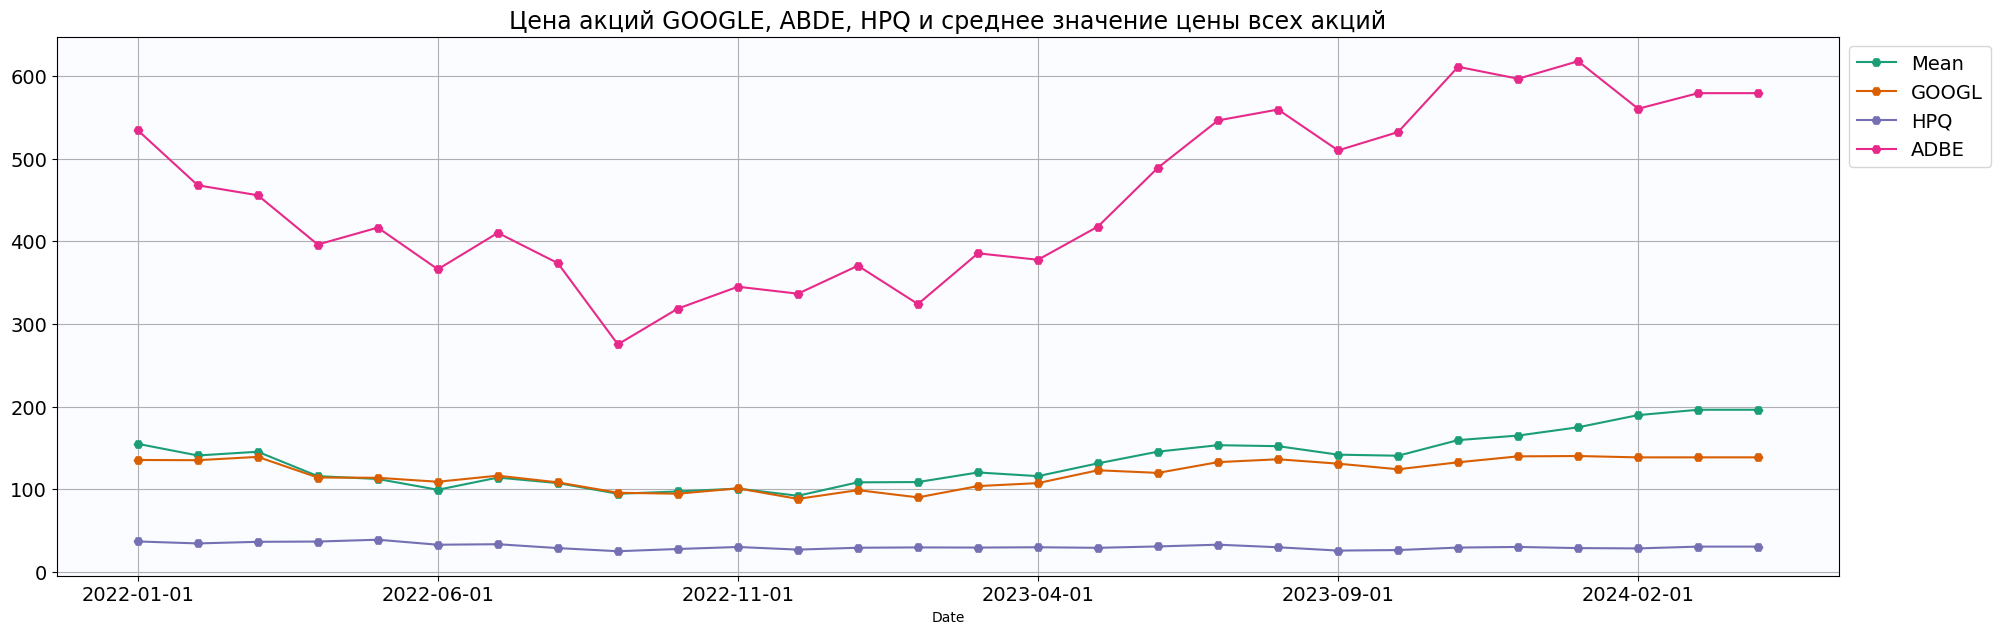

In [43]:
# Построение графика на основе транспонированного датафрейма + установка параметров графика
# Цвета линий графика выбираются из палитры tab_20 из matplotlib последовательно (для каждой из 18ти стран свой цвет)
chart_stocks=df_chart.plot(grid=True,figsize=(23,7), title='Цена акций GOOGLE, ABDE, HPQ и среднее значение цены всех акций', marker='H', fontsize=14, color=sns.color_palette("Dark2"))
chart_stocks.title.set_size(17)  # Установка размера шрифта заголовка
chart_stocks.legend(loc='upper left',bbox_to_anchor=(1, 1),fontsize=14)  # Установка параметров Легенд
chart_stocks.set_facecolor('#fafcff')  # Установка цвета фона

Как можно видеть по полученному графику, на протяжениии всего периода акции Googl держались примерно на уровне средней цены среди всех акций.

**<h2>Вывод</h2>**

---
В процессе выполнения домашнего задания был приобретён опыт решения практических задач по анализу данных, таких как загрузка, трансформация, вычисление простых статистик и визуализация данных в виде графиков и диаграмм, посредством языка программирования Python.